In [1]:
import pandas_datareader as pdr

In [2]:
key = 'e1781913d1c61e79a9f9a41945328bcd102ebbc8'

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\User\AppData\Local\Temp\ipykernel_2564\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-01-29 00:00:00+00:00,154.68,158.1300,154.1100,156.25,41587239,37.114721,37.942532,36.977952,37.491435,166348956,0.0,1.0
1,AAPL,2019-01-30 00:00:00+00:00,165.25,166.1500,160.2300,163.25,61109780,39.650942,39.866893,38.446417,39.171051,244439120,0.0,1.0
2,AAPL,2019-01-31 00:00:00+00:00,166.44,169.0000,164.5600,166.11,40739649,39.936477,40.550736,39.485380,39.857295,162958596,0.0,1.0
3,AAPL,2019-02-01 00:00:00+00:00,166.52,168.9800,165.9300,166.96,32668138,39.955672,40.545937,39.814105,40.061248,130672552,0.0,1.0
4,AAPL,2019-02-04 00:00:00+00:00,171.25,171.6600,167.2800,167.41,31495582,41.090613,41.188990,40.138031,40.169223,125982328,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-01-22 00:00:00+00:00,193.89,195.3300,192.2600,192.30,60133852,193.890000,195.330000,192.260000,192.300000,60133852,0.0,1.0
1254,AAPL,2024-01-23 00:00:00+00:00,195.18,195.7500,193.8299,195.02,42355590,195.180000,195.750000,193.829900,195.020000,42355590,0.0,1.0
1255,AAPL,2024-01-24 00:00:00+00:00,194.50,196.3800,194.3400,195.42,53463269,194.500000,196.380000,194.340000,195.420000,53463269,0.0,1.0
1256,AAPL,2024-01-25 00:00:00+00:00,194.17,196.2675,193.1125,195.22,54822126,194.170000,196.267500,193.112500,195.220000,54822126,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df.shape

(1258, 14)

In [9]:
df[1228:].head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1228,AAPL,2023-12-13 00:00:00+00:00,197.96,198.0000,194.85,195.09,70404183,197.96,198.0000,194.85,195.09,70404183,0.0,1.0
1229,AAPL,2023-12-14 00:00:00+00:00,198.11,199.6200,196.16,198.02,66831572,198.11,199.6200,196.16,198.02,66831572,0.0,1.0
1230,AAPL,2023-12-15 00:00:00+00:00,197.57,198.3999,197.00,197.53,128538401,197.57,198.3999,197.00,197.53,128538401,0.0,1.0
1231,AAPL,2023-12-18 00:00:00+00:00,195.89,196.6300,194.39,196.09,55751861,195.89,196.6300,194.39,196.09,55751861,0.0,1.0
1232,AAPL,2023-12-19 00:00:00+00:00,196.94,196.9500,195.89,196.16,40233138,196.94,196.9500,195.89,196.16,40233138,0.0,1.0


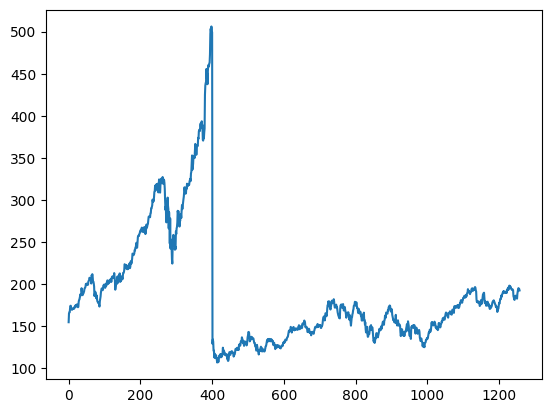

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data , so we apply MiniMax scaler

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1258, 1)

In [14]:
df1

array([[0.11982467],
       [0.14629931],
       [0.1492799 ],
       ...,
       [0.21956168],
       [0.21873513],
       [0.21435191]])

                           SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [15]:
from sklearn.model_selection import train_test_split
training_set = int(len(df1)*0.65)
test_set = len(df1) - training_set
train_data , test_data = df1[0:training_set,:] , df1[training_set:len(df1):]

In [27]:
import numpy 
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [28]:
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [29]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(X_test.shape) , print(y_test.shape)

(340, 100)
(340,)


(None, None)

X_train =X_train.reshape(X_train.shape[0] , X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0] , X_test.shape[1],1)

                                         STACK LSTM MODEL

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

                                          OPTIMIZERS

SGD(stochastic gradient descent) : update model weights based on the gradients of the loss function 


Adam : combination of both ADAGRAD and RMSprop


RMSprop : utilizes the moving average of squared gradients for normalizing the gradient descent 

Adadelta : extension of AdaGrad that adapts learning rates based on a fixed-size window of previous gradient updates.


Adamax: A variant of Adam based on the infinity norm.

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100

12/12 [==============================] - 10s 271ms/step - loss: 0.0329 - val_loss: 7.7390e-04
Epoch 2/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0113 - val_loss: 3.1170e-04
Epoch 3/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0096 - val_loss: 2.8564e-04
Epoch 4/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0082 - val_loss: 4.3987e-04
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0073 - val_loss: 2.5091e-04
Epoch 6/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0064 - val_loss: 2.5202e-04
Epoch 7/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0057 - val_loss: 8.9036e-04
Epoch 8/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0053 - val_loss: 2.5160e-04
Epoch 9/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0048 - val_loss: 2.2179e-04
Epoch 10/100
12/12 [==============================] -

12/12 [==============================] - 2s 128ms/step - loss: 0.0016 - val_loss: 1.7870e-04
Epoch 77/100
12/12 [==============================] - 1s 126ms/step - loss: 0.0014 - val_loss: 1.7758e-04
Epoch 78/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0022 - val_loss: 8.5264e-04
Epoch 79/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0020 - val_loss: 1.8492e-04
Epoch 80/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0019 - val_loss: 2.0495e-04
Epoch 81/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0013 - val_loss: 2.6695e-04
Epoch 82/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0015 - val_loss: 1.6528e-04
Epoch 83/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0013 - val_loss: 1.7554e-04
Epoch 84/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0010 - val_loss: 1.6686e-04
Epoch 85/100
12/12 [==============================] - 2s 15

In [44]:
import tensorflow as tf

In [46]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [47]:
# transform the data present to its original form - reverse sacling of the data present

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


ROOT MEAN SQUARED PERFORMANCE MATRIX

In [48]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

221.53674914397712

In [49]:
math.sqrt(mean_squared_error(y_test , test_predict))

168.9084775527975

                                              PLOT

Blue - The original data of the dataset

Yellow - Training dataset

Green - Test dataset


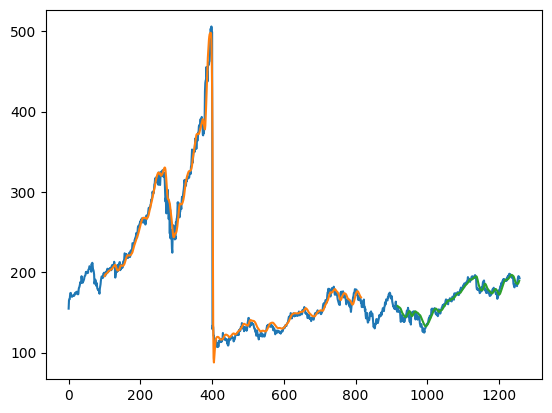

In [53]:
look_back = 100


trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan


trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [54]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
x_input = test_data[341:].reshape(1,-1)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
temp_input

[0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966

In [61]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = array(temp_input[1:]).reshape(1, -1, 1)
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i += 1

print(lst_output)


[[0.2229842096567154], [0.22325043380260468], [0.22351396083831787], [0.2237745076417923], [0.22403191030025482], [0.22428621351718903], [0.22453752160072327], [0.22478599846363068], [0.22503189742565155], [0.22527554631233215], [0.22551719844341278], [0.2257571965456009], [0.22599588334560394], [0.22623346745967865], [0.22647029161453247], [0.22670665383338928], [0.2269427329301834], [0.2271786332130432], [0.22741462290287018], [0.22765077650547028], [0.22788724303245544], [0.2281239926815033], [0.22836120426654816], [0.22859878838062286], [0.22883684933185577], [0.22907531261444092], [0.2293141931295395], [0.2295534461736679], [0.2297929972410202], [0.23003289103507996]]


In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [63]:
len(df1)

1258

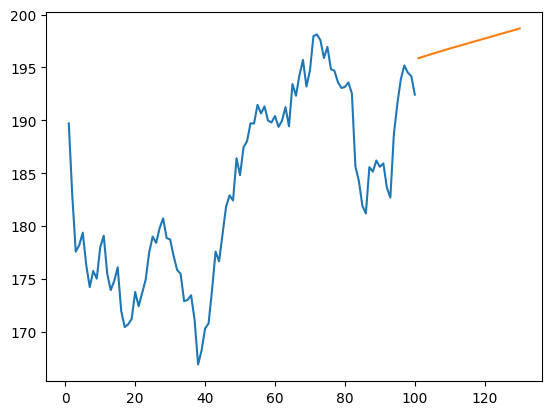

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

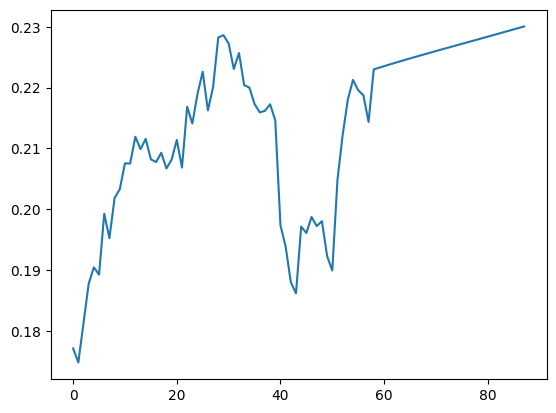

In [65]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

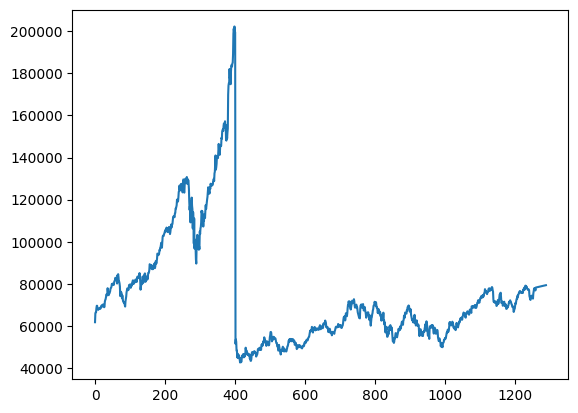

In [67]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)